# Project Topic: Travel Insurance

## Business Problem Understanding

### Context
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian baik di dalam negeri maupun luar negeri. Beberapa negara bahkan mewajibkan wisatawan untuk memiliki asuransi perjalanan, misalnya, negara-negara di Eropa dan Amerika. Besaran premi tergantung pada pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis di perusahaan asuransi adalah data historis yang terdiri dari tujuan, produk asuransi, dan sebagainya.

### Latar Belakang Permasalahan Bisnis
Perusahaan asuransi perjalanan menghadapi tantangan dalam **mengidentifikasi pelanggan yang paling mungkin mengajukan klaim saat bepergian**. Mengetahui pemegang polis mana yang kemungkinan besar akan mengajukan klaim adalah hal yang  penting karena dapat **membantu bisnis mengelola risiko, menetapkan premi dengan lebih akurat, dan meningkatkan keuntungan**. Data historis yang ada, termasuk banyaknya informasi  pemegang polis dan klaim, dapat digunakan untuk menciptakan model prediktif yang membantu perusahaan mencapai tujuan tersebut.

### Tujuan yang Ingin Dicapai
Tujuan yang ingin dicapai adalah membangun model machine learning yang dapat memprediksi apakah pemegang polis asuransi perjalanan akan mengajukan klaim atau tidak berdasarkan data historis mereka. Dengan memiliki model prediktif yang akurat, perusahaan dapat:

1. **Mengelola risiko dengan lebih baik**: Mengidentifikasi pelanggan yang berpotensi mengajukan klaim sehingga dapat mengatur strategi mitigasi risiko yang tepat.
2. **Menetapkan premi yang lebih tepat**: Menyesuaikan premi berdasarkan profil risiko pelanggan untuk memastikan keadilan dan profitabilitas.
3. **Meningkatkan efisiensi operasional**: Mengurangi waktu dan sumber daya yang dihabiskan untuk memproses klaim yang tidak diperlukan.
4. **Meningkatkan kepuasan pelanggan**: Dengan memberikan layanan yang lebih cepat dan efisien kepada pelanggan yang benar-benar membutuhkan pertanggungan.

### Analytic Approach
Pendekatan analitik yang akan digunakan adalah klasifikasi karena tujuan utamanya adalah **memprediksi kategori (klaim (0) atau tidak klaim (1))**. Model machine learning yang sesuai akan dibangun dan dievaluasi untuk mencapai tujuan ini.

### Evaluation Metrics
Berdasarkan permasalahan bisnis, beberapa metrik evaluasi yang akan difokuskan adalah:

- **Accuracy**: Untuk melihat secara keseluruhan seberapa baik model memprediksi.
- **Precision**: Untuk mengukur ketepatan dari prediksi klaim (menghindari false positive).
- **Recall (Sensitivity)**: Untuk mengukur kemampuan model dalam menangkap klaim yang sebenarnya terjadi (menghindari false negative).
- **F1-Score**: Kombinasi dari precision dan recall untuk mendapatkan metrik kinerja yang seimbang.

## Data Understanding
Dataset yang digunakan berisi kumpulan data diri pelanggan, nama dan agensi yang digunakan serta status klaim asuransi dari pelanggan jasa asuransi perjalanan

Berikut adalah atribut dan penjelasan singkat atribut tersebut:
- Agency: Nama agensi asuransi perjalanan.
- Agency Type: Tipe agensi asuransi perjalanan.
- Distribution Channel: Channel atau platform distribusi agensi.
- Product Name: Nama dari produk asuransi perjalanan.
- Gender: Jenis kelamin tertanggung.
- Duration: Durasi travel.
- Destination: Tujuan travel.
- Net Sales: Jumlah penjualan polis asuransi perjalanan.
- Commission (in value): Komisi yang diterima untuk agen asuransi perjalanan.
- Age: Umur tertanggung.
- Claim: Status klaim asuransi pelanggan.

In [33]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
# Membaca dataset
file_path = "/content/data_travel_insurance.csv"
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dan terakhir dari dataset
display(df.head(),df.tail())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


### Exploratory Data Analysis
Untuk memahami lebih lanjut tentang dataset ini kita akan melakukan eksplorasi data. Ini termasuk melihat tipe data, memeriksa nilai yang hilang, dan memahami distribusi data.

In [3]:
# Melihat informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
# Melihat statistik deskriptif dari dataset
display(df.describe(), df.describe(include='object'))

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


## Data Cleaning

Dapat dilihat diatas, pada fitur/kolom '**Gender**' terdapat data hilang/tidak tersedia yang sangat banyak.   Oleh karena itu, kita akan mencoba memperbaiki dataset tersebut.

In [5]:
pd.set_option('display.max_colwidth', 1)

# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Data Feature', 'Jumlah Value Unik', 'Tipe Data', 'Jumlah Data Kosong', 'Persentase Data Kosong', 'Sampel Value Unik'], data=listItem)
display(tabel1Desc)

,Data Feature,Jumlah Value Unik,Tipe Data,Jumlah Data Kosong,Persentase Data Kosong,Sampel Value Unik
0,Agency,16,object,0,0.00,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,object,0,0.00,"[Airlines, Travel Agency]"
2,Distribution Channel,2,object,0,0.00,"[Online, Offline]"
3,Product Name,26,object,0,0.00,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,object,31647,71.39,"[F, nan, M]"
5,Duration,437,int64,0,0.00,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,object,0,0.00,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,float64,0,0.00,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,float64,0,0.00,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"


Dapat dilihat diatas bahwa untuk fitur/kolom selain '**Gender**' tidak ada anomali.


Fitur '**Gender**' memiliki 31,647 data kosong yang merupakan 71.39% dari keseluruhan data dalam kolom. Kita perlu memutuskan bagaimana menangani missing values ini. Beberapa opsi yang dapat dipertimbangkan adalah:

- Menghapus kolom 'Gender' jika dirasa tidak terlalu penting.
- Mengisi missing values dengan nilai yang sering muncul (mode) atau kategori 'Unknown'.
- Mengisi missing values berdasarkan data lain (misalnya, menggunakan model prediktif).



Mari kita lihat distribusi nilai pada kolom 'Gender' untuk membuat keputusan yang tepat.

In [6]:
# Melihat distribusi nilai pada kolom 'Gender'
print(df['Gender'].value_counts(dropna=False))

Gender
NaN    31647
M      6504 
F      6177 
Name: count, dtype: int64


Pertama, kita akan memisahkan data yang memiliki nilai 'Gender' dan yang tidak memiliki nilai 'Gender'.

In [7]:
# Memisahkan data dengan dan tanpa missing values pada kolom 'Gender'
data_with_gender = df[df['Gender'].notnull()]
data_without_gender = df[df['Gender'].isnull()]

print(data_with_gender.shape)
print(data_without_gender.shape)

(12681, 11)
(31647, 11)


Selanjutnya, kita akan menyiapkan data untuk melatih model klasifikasi. Kita akan menggunakan data yang memiliki nilai 'Gender' sebagai data training.

Kita akan memilih fitur-fitur yang relevan untuk memprediksi 'Gender'. Kita bisa mencoba menggunakan 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', dan 'Age'.

In [8]:
# Memilih fitur yang relevan
features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age']
X = data_with_gender[features]
y = data_with_gender['Gender']

# Menampilkan beberapa baris pertama dari fitur dan target
print(X.head())
print(y.head())


   Agency Agency Type Distribution Channel        Product Name  Duration  \
0   C2B    Airlines    Online               Annual Silver Plan  365        
2   JZI    Airlines    Online               Basic Plan          19         
4   C2B    Airlines    Online               Bronze Plan         8          
8   JZI    Airlines    Online               Basic Plan          4          
11  C2B    Airlines    Online               Annual Silver Plan  365        

   Destination  Net Sales  Commision (in value)  Age  
0   SINGAPORE   216.0      54.0                  57   
2   INDIA       22.0       7.7                   26   
4   SINGAPORE   16.0       4.0                   28   
8   THAILAND    22.0       7.7                   39   
11  SINGAPORE   216.0      54.0                  27   
0     F
2     M
4     M
8     M
11    M
Name: Gender, dtype: object


Data kategorikal perlu diubah menjadi format numerik menggunakan teknik One-Hot Encoding. Karena sebagian besar algoritma machine learning hanya dapat bekerja dengan data numerik. Mereka membutuhkan representasi numerik untuk melakukan perhitungan matematis yang mendasari proses pembelajaran. Dengan data numerik, model dapat belajar pola yang lebih kompleks dan dapat meningkatkan kinerjanya. Data numerik juga memungkinkan penggunaan teknik seperti standardisasi atau normalisasi yang dapat membantu model bekerja lebih baik.

In [9]:
# Menggunakan One-Hot Encoding untuk data kategorikal
X_encoded = pd.get_dummies(X)

# Menampilkan dataset yang telah diencode
print(X_encoded.head())


    Duration  Net Sales  Commision (in value)  Age  Agency_ADM  Agency_ART  \
0   365       216.0      54.0                  57   False       False        
2   19        22.0       7.7                   26   False       False        
4   8         16.0       4.0                   28   False       False        
8   4         22.0       7.7                   39   False       False        
11  365       216.0      54.0                  27   False       False        

    Agency_C2B  Agency_CBH  Agency_CCR  Agency_CSR  ...  Destination_SWEDEN  \
0   True        False       False       False       ...  False                
2   False       False       False       False       ...  False                
4   True        False       False       False       ...  False                
8   False       False       False       False       ...  False                
11  True        False       False       False       ...  False                

    Destination_SWITZERLAND  Destination_TAIWAN, PROVINC

One-hot encoding menghindari anggapan bahwa ada hubungan ordinal (urutan) antara kategori. Jika kita menggunakan label encoding (memberikan angka unik untuk setiap kategori), model bisa salah menginterpretasikan kategori tersebut sebagai sesuatu yang memiliki urutan, misalnya, 0 < 1 < 2.

Dengan one-hot encoding, kita juga dapat mengurangi risiko bias dalam model karena kategori tertentu.

Kita akan menggunakan algoritma Decision Tree untuk melatih model klasifikasi dan memprediksi nilai 'Gender' yang hilang.

Decision tree tidak sensitif terhadap skala data, sehingga kita tidak perlu menormalkan atau menstandarisasi data sebelum menggunakannya. Ini menghemat waktu dan usaha dalam preprocessing.

In [10]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.55


Setelah model dilatih, kita akan menggunakan model ini untuk memprediksi nilai 'Gender' yang hilang pada data yang tidak memiliki nilai 'Gender'.

In [11]:
# Menyiapkan data tanpa gender untuk prediksi
X_missing = data_without_gender[features]
X_missing_encoded = pd.get_dummies(X_missing)

# Mengatasi ketidaksesuaian kolom antara data yang diencode
X_missing_encoded = X_missing_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Membuat prediksi untuk data yang hilang
gender_predictions = model.predict(X_missing_encoded)

# Menambahkan prediksi ke dalam data_without_gender
data_without_gender['Gender'] = gender_predictions

# Menggabungkan kembali data_with_gender dan data_without_gender
df_filled = pd.concat([data_with_gender, data_without_gender])

# Memeriksa apakah masih ada missing values pada kolom 'Gender'
print(df_filled.isnull().sum())

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64


<ipython-input-11-d4836b726b54>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_gender['Gender'] = gender_predictions


Terakhir, kita akan memverifikasi hasil dan menyimpan dataset yang telah diperbaiki.

In [12]:
# Memverifikasi beberapa baris pertama dari dataset yang telah diperbaiki
print(df_filled.head())

# Menyimpan dataset yang telah diperbaiki
df_filled.to_csv('data_travel_insurance_filled.csv', index=False)


   Agency Agency Type Distribution Channel        Product Name Gender  \
0   C2B    Airlines    Online               Annual Silver Plan  F       
2   JZI    Airlines    Online               Basic Plan          M       
4   C2B    Airlines    Online               Bronze Plan         M       
8   JZI    Airlines    Online               Basic Plan          M       
11  C2B    Airlines    Online               Annual Silver Plan  M       

    Duration Destination  Net Sales  Commision (in value)  Age Claim  
0   365       SINGAPORE   216.0      54.0                  57   No    
2   19        INDIA       22.0       7.7                   26   No    
4   8         SINGAPORE   16.0       4.0                   28   No    
8   4         THAILAND    22.0       7.7                   39   No    
11  365       SINGAPORE   216.0      54.0                  27   No    


In [13]:
# Membaca dataset
file_path = "/content/data_travel_insurance_filled.csv"
df = pd.read_csv(file_path)

Cek kembali informasi dataframe

In [14]:
# Melihat distribusi nilai pada kolom 'Gender'
print(df['Gender'].value_counts(dropna=False))

Gender
F    26156
M    18172
Name: count, dtype: int64


In [15]:
pd.set_option('display.max_colwidth', 1)

# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Data Feature', 'Jumlah Value Unik', 'Tipe Data', 'Jumlah Data Kosong', 'Persentase Data Kosong', 'Sampel Value Unik'], data=listItem)
display(tabel1Desc)

,Data Feature,Jumlah Value Unik,Tipe Data,Jumlah Data Kosong,Persentase Data Kosong,Sampel Value Unik
0,Agency,16,object,0,0.0,"[C2B, JZI, LWC, ART, CSR, KML, RAB, TST, TTW, JWT, ADM, CWT, CCR, CBH, EPX, SSI]"
1,Agency Type,2,object,0,0.0,"[Airlines, Travel Agency]"
2,Distribution Channel,2,object,0,0.0,"[Online, Offline]"
3,Product Name,26,object,0,0.0,"[Annual Silver Plan, Basic Plan, Bronze Plan, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Rental Vehicle Excess Insurance, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family, Cancellation Plan, 2 way Comprehensive Plan, 1 way Comprehensive Plan, Ticket Protector]"
4,Gender,2,object,0,0.0,"[F, M]"
5,Duration,437,int64,0,0.0,"[365, 19, 8, 4, 103, 376, 12, 30, 9, 2, 3, 5, 370, 43, 366, 16, 26, 23, 42, 10, 173, 7, 82, 95, 40, 11, 38, 13, 58, 28, 44, 27, 6, 63, 21, 74, 24, 17, 14, 18, 39, 51, 368, 71, 0, 116, 84, 68, 64, 176, 387, 34, 41, 381, 15, 161, 35, 65, 121, 393, 22, 69, 47, 87, 90, 101, 102, 20, 29, 386, 54, 383, 81, 283, 109, 61, 55, 56, 49, 215, 1, 33, 228, 32, 48, 76, 369, 31, 66, 53, 372, 107, 142, 91, 45, 25, 89, 226, 373, 85, ...]"
6,Destination,138,object,0,0.0,"[SINGAPORE, INDIA, THAILAND, KOREA, REPUBLIC OF, VIET NAM, SRI LANKA, UNITED KINGDOM, IRAN, ISLAMIC REPUBLIC OF, CHINA, MALAYSIA, INDONESIA, BELGIUM, BRUNEI DARUSSALAM, PHILIPPINES, JAPAN, GERMANY, UNITED STATES, AUSTRALIA, HONG KONG, MYANMAR, CAMBODIA, SWITZERLAND, MACAO, LAO PEOPLE'S DEMOCRATIC REPUBLIC, TAIWAN, PROVINCE OF CHINA, NEPAL, ITALY, NETHERLANDS, TURKEY, NEW ZEALAND, CANADA, TURKMENISTAN, UNITED ARAB EMIRATES, FINLAND, PERU, FRANCE, PORTUGAL, BANGLADESH, JORDAN, MALI, IRELAND, SPAIN, BAHRAIN, BHUTAN, BELARUS, ANGOLA, DENMARK, EGYPT, NAMIBIA, MOROCCO, BULGARIA, NORWAY, AUSTRIA, ESTONIA, SOUTH AFRICA, PAKISTAN, GUINEA, CYPRUS, SWEDEN, ISRAEL, ARGENTINA, HUNGARY, RUSSIAN FEDERATION, QATAR, CROATIA, POLAND, PAPUA NEW GUINEA, BRAZIL, MAURITIUS, CZECH REPUBLIC, KENYA, OMAN, MONGOLIA, GREECE, TANZANIA, UNITED REPUBLIC OF, SERBIA, LUXEMBOURG, MALTA, SAUDI ARABIA, UKRAINE, ICELAND, MEXICO, CAYMAN ISLANDS, PANAMA, KAZAKHSTAN, TUNISIA, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, VENEZUELA, COSTA RICA, LEBANON, KUWAIT, AZERBAIJAN, ECUADOR, UZBEKISTAN, CHILE, FIJI, FRENCH POLYNESIA, NIGERIA, ...]"
7,Net Sales,1006,float64,0,0.0,"[216.0, 22.0, 16.0, 26.0, 252.85, 30.0, 36.0, 125.0, 21.04, 204.6, 29.0, 30.55, 35.0, 18.0, 0.0, 21.0, 48.5, -216.75, 33.0, 161.0, 45.0, 75.0, 39.0, 17.55, 80.25, 72.0, 17.0, 15.0, 76.3, 19.5, 29.5, 62.0, 22.5, 42.0, 44.0, 33.5, 53.25, 62.25, 32.0, 56.5, 58.0, 20.0, 97.0, 40.0, 26.5, 69.0, 83.0, 35.5, 13.5, 63.5, 43.55, 109.0, 72.5, 280.8, 31.0, 291.75, 34.5, 18.5, 27.0, 3.22, 14.11, 4.95, 41.5, 167.0, 47.5, 94.0, 27.75, 24.5, 24.0, 50.0, 52.65, 37.0, 63.7, 14.95, 187.85, 25.0, 23.0, 17.5, 57.0, 3.74, 333.0, 23.4, 100.0, 74.0, 18.07, 81.0, -61.0, 60.0, 32.9, 53.0, 138.5, 256.2, -86.0, 87.0, 40.5, 88.5, 61.0, 259.2, 229.8, 19.8, ...]"
8,Commision (in value),915,float64,0,0.0,"[54.0, 7.7, 4.0, 9.1, 63.21, 10.5, 23.4, 7.5, 43.75, 7.36, 132.99, 9.57, 7.64, 12.25, 6.3, 5.63, 5.25, 31.53, 54.19, 11.55, 10.15, 40.25, 15.75, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 6.0, 19.07, 4.88, 7.38, 15.5, 14.7, 15.4, 8.38, 13.31, 15.56, 8.0, 36.73, 13.65, 20.3, 5.0, 0.0, 10.0, 6.63, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 10.89, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 1.13, 4.94, 1.73, 10.38, 58.45, 11.88, 23.5, 6.94, 6.13, 17.5, 13.16, 12.95, 15.93, 3.74, 46.96, 16.25, 9.2, 4.38, 3.75, 14.25, 120.5, 1.31, 83.25, 12.54, 5.85, 40.0, 6.32, 28.35, 21.35, 17.23, 15.0, 7.25, 8.22, 13.25, 34.63, 166.53, ...]"
9,Age,89,int64,0,0.0,"[57, 26, 28, 39, 

## Visualisasi Data

Visualisasi data akan membantu kita memahami distribusi dan hubungan antar variabel. Kita akan membuat beberapa visualisasi dasar untuk melihat pola dalam data.

### Distribusi Variabel Kategorikal

Kita dapat menggunakan bar plot untuk melihat distribusi variabel kategorikal seperti 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', dan 'Destination'.

<Figure size 1200x800 with 0 Axes>

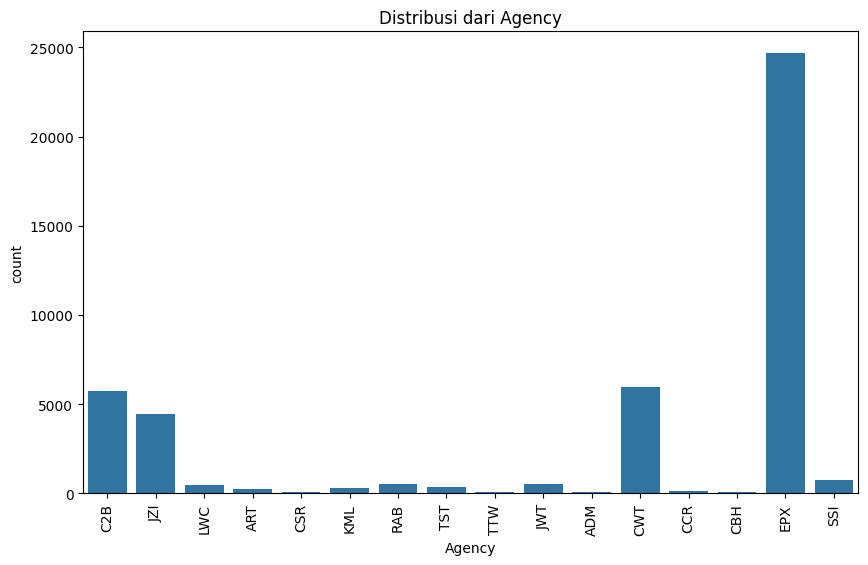

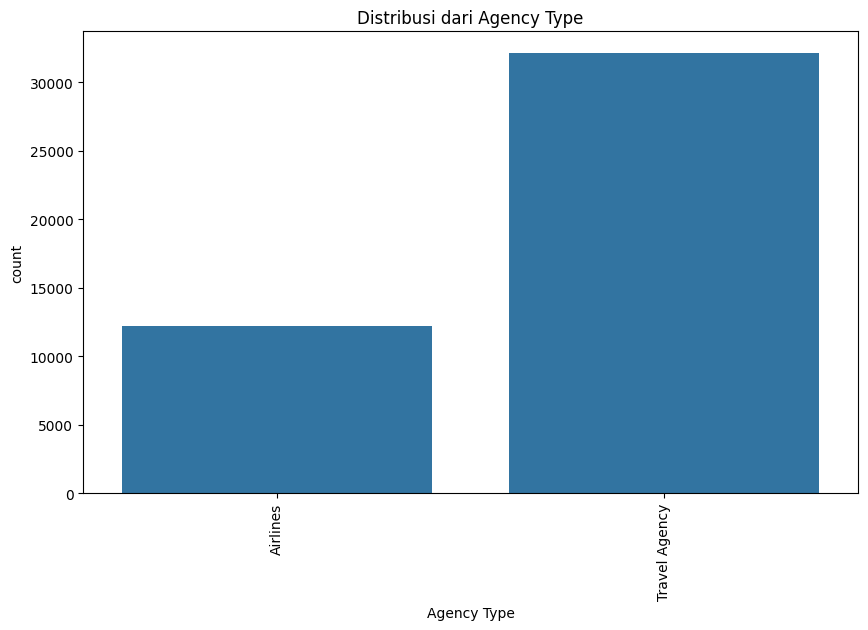

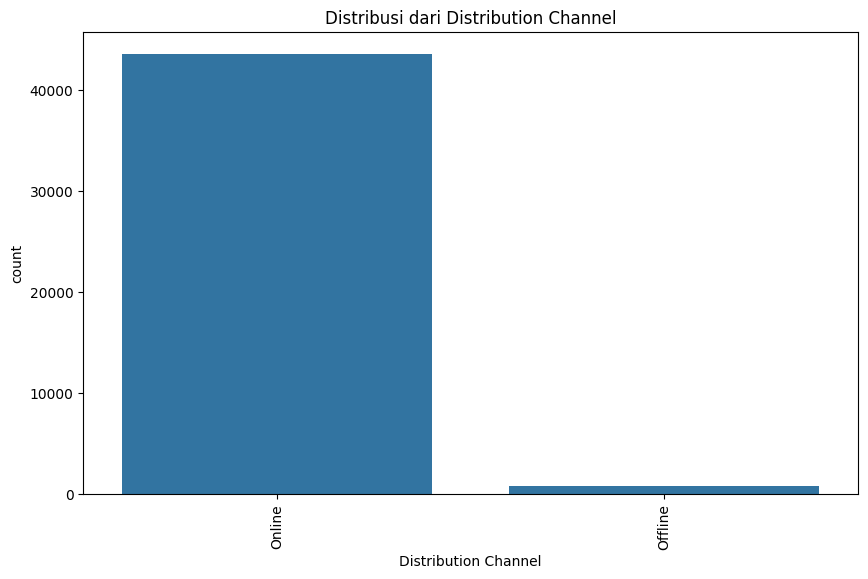

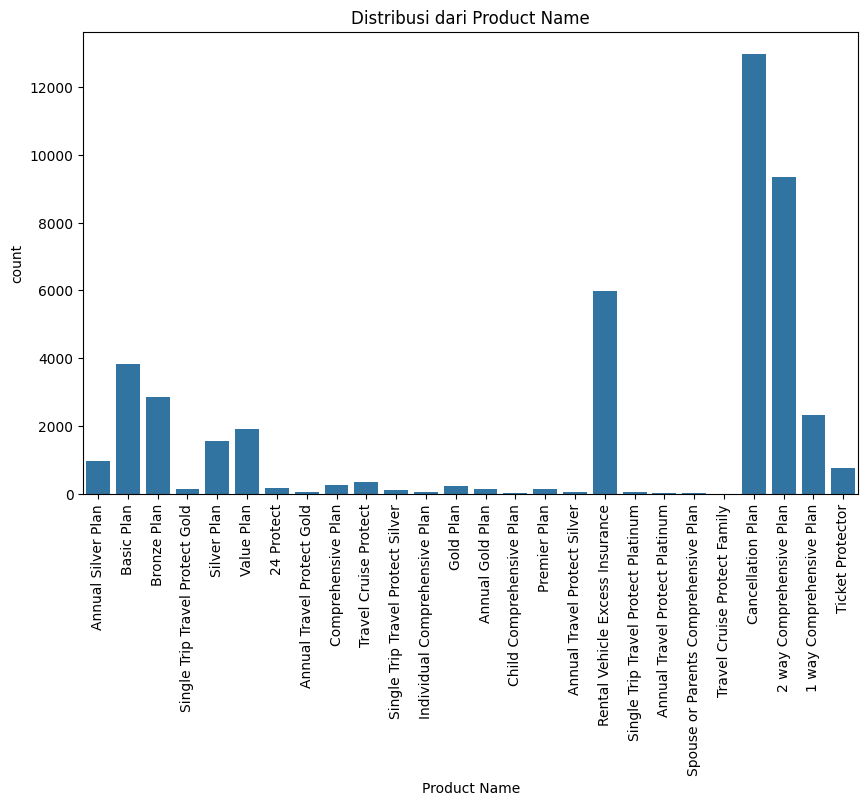

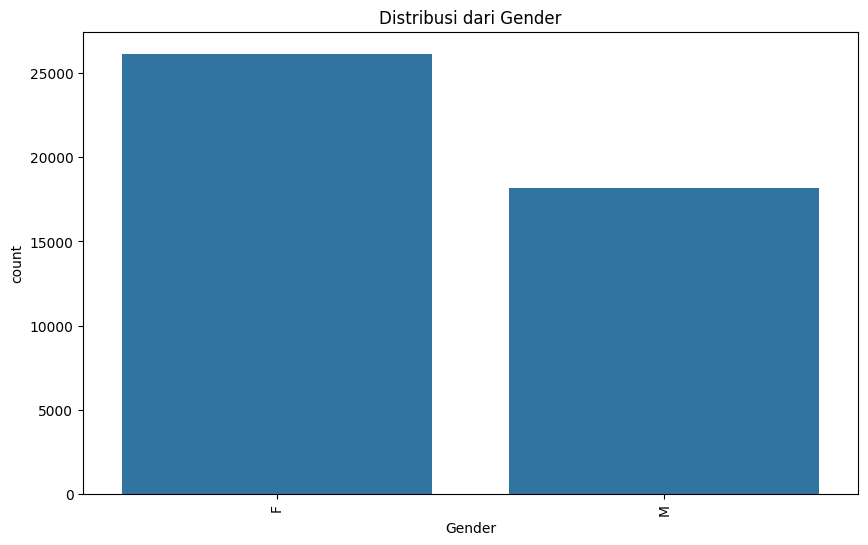

In [16]:
# Mengatur ukuran plot
plt.figure(figsize=(12, 8))

# Membuat bar plot untuk variabel kategorikal
categorical_columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribusi dari {column}')
    plt.xticks(rotation=90)
    plt.show()


### Distribusi Variabel Numerik

Kita dapat menggunakan histogram untuk melihat distribusi variabel numerik seperti 'Duration', 'Net Sales', 'Commision (in value)', dan 'Age'.

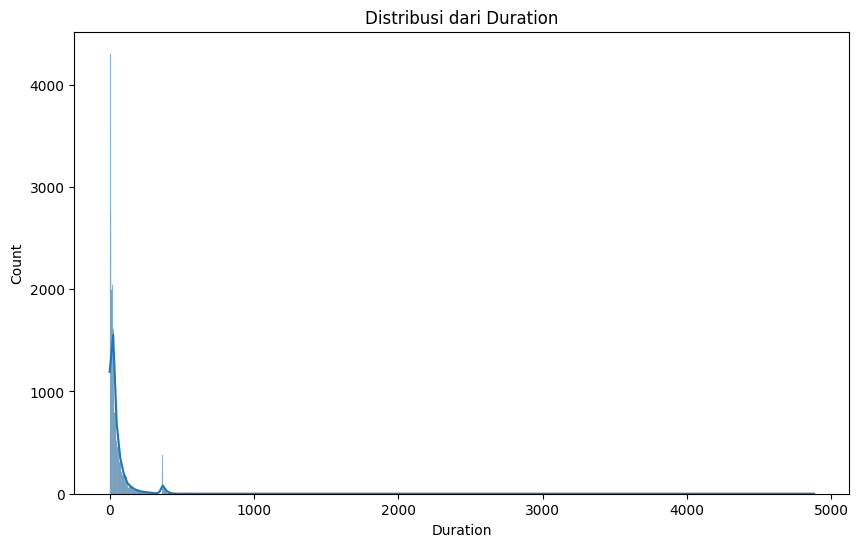

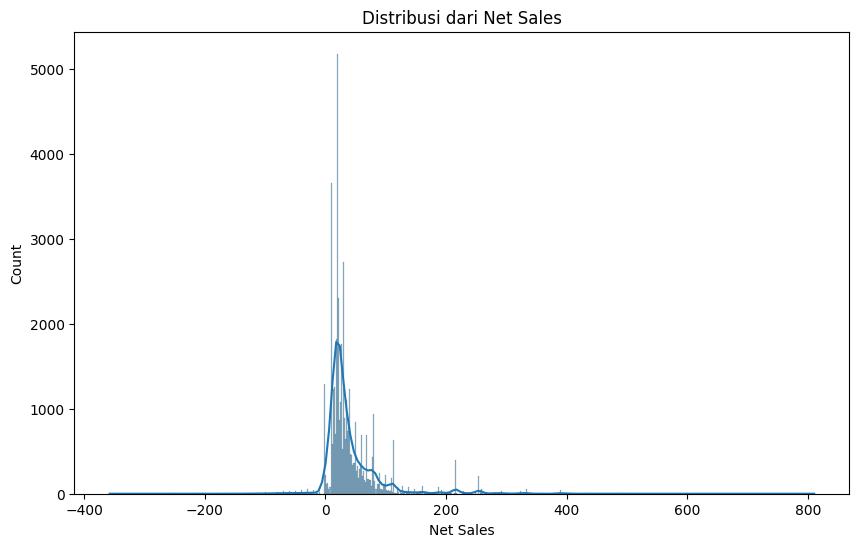

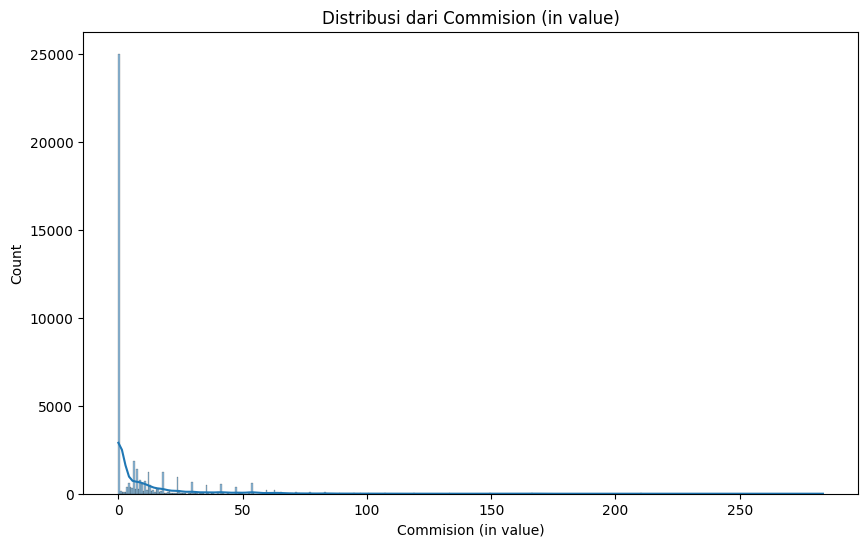

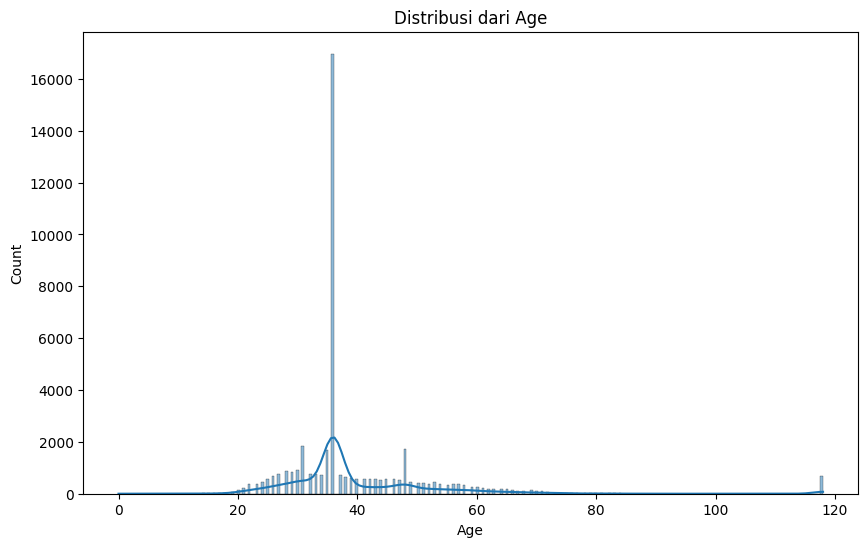

In [17]:
# Membuat histogram untuk variabel numerik
numerical_columns = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi dari {column}')
    plt.show()


### Hubungan Antar Variabel
Kita juga dapat memeriksa hubungan antara beberapa variabel penting, misalnya hubungan antara 'Age' dan 'Claim', 'Net Sales' dan 'Claim', serta 'Duration' dan 'Claim'.

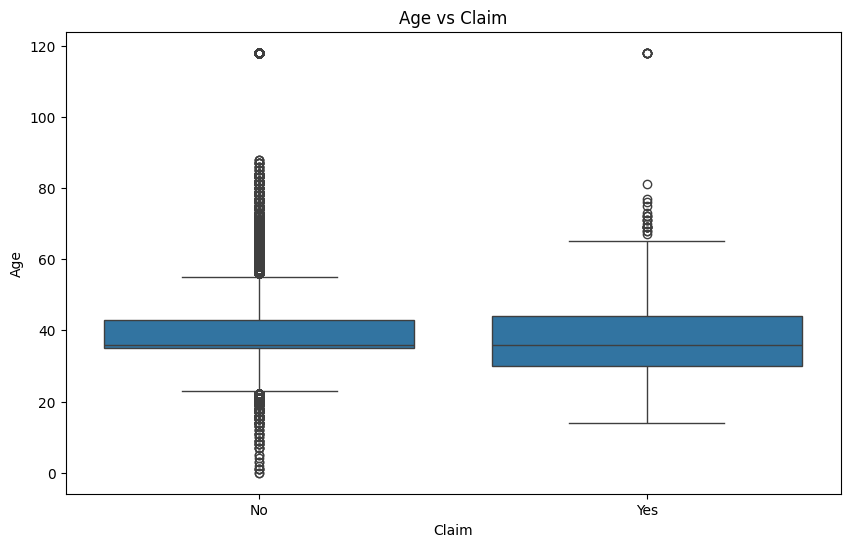

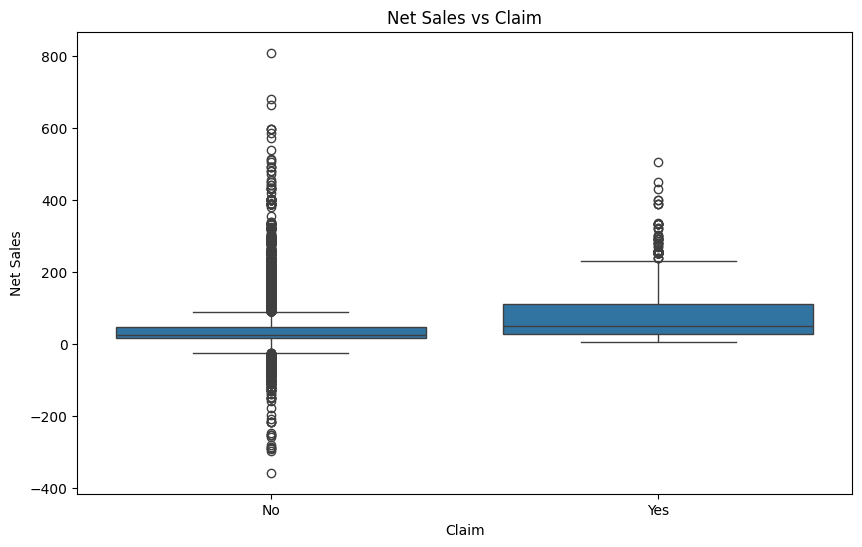

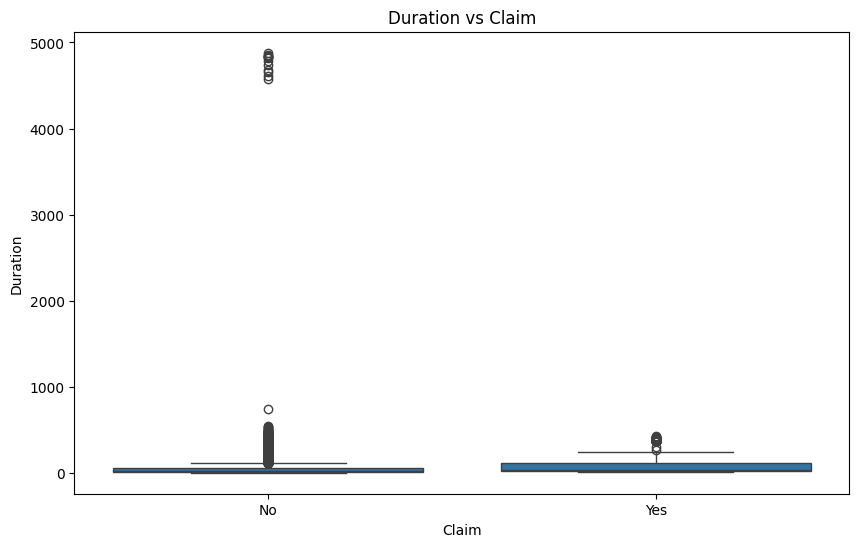

In [18]:
# Memotong data di persentil 99 untuk menghilangkan outliers
upper_limit = df['Age'].quantile(0.99)
df_trimmed = df[df['Age'] <= upper_limit]

# Membuat plot hubungan antara Age dan Claim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Claim', y='Age')
plt.title('Age vs Claim')
plt.show()

# Membuat plot hubungan antara Net Sales dan Claim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Claim', y='Net Sales')
plt.title('Net Sales vs Claim')
plt.show()

# Membuat plot hubungan antara Duration dan Claim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Claim', y='Duration')
plt.title('Duration vs Claim')
plt.show()


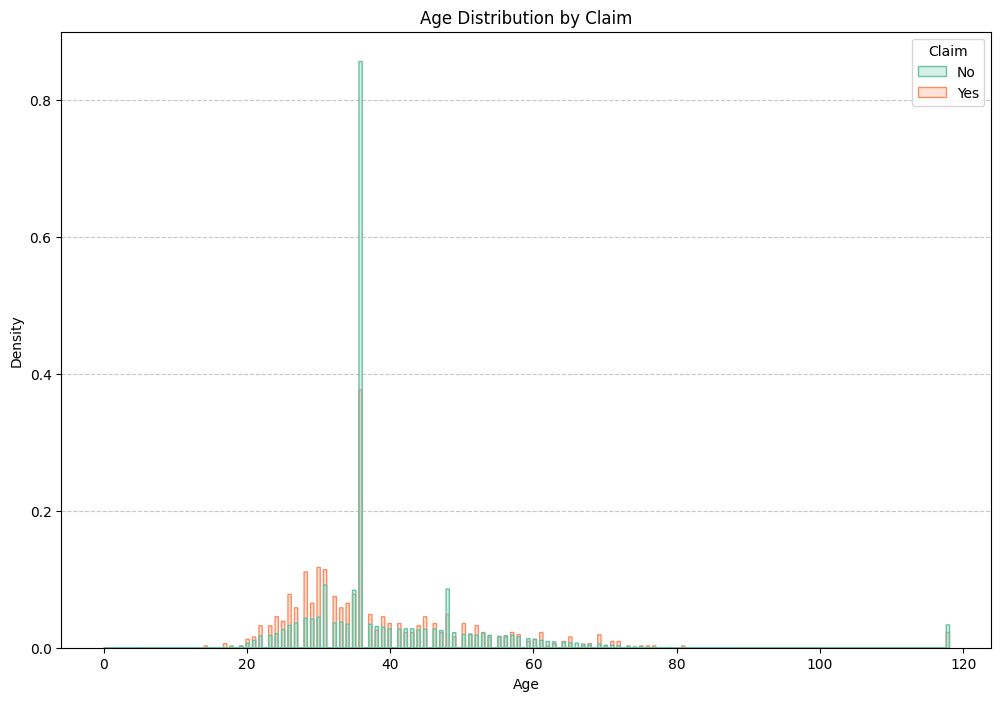

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_trimmed, x='Age', hue='Claim', element='step', stat='density', common_norm=False, palette="Set2")
plt.title('Age Distribution by Claim')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Data Preprocessing

Pertama, kita perlu melakukan encoding pada kolom-kolom kategori, membuang kolom yang tidak relevan, dan memastikan tidak ada missing values.

In [20]:
# Mengubah kolom 'Claim' menjadi numerik
df['Claim'] = df['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding kolom kategori
categorical_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Memastikan tidak ada missing values
df.isnull().sum()

### Splitting Data
Membagi data menjadi set training dan testing.

In [21]:
# Membagi data menjadi fitur dan target
X = df.drop(columns=['Claim'])
y = df['Claim']

# Membagi data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Selection

Kita akan menggunakan beberapa model untuk klasifikasi dan memilih yang terbaik berdasarkan kinerja mereka.

In [23]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"Model: {name}")
    train_and_evaluate(model, X_train, X_test, y_train, y_test)
    print("\n" + "="*60 + "\n")


Model: Logistic Regression
Accuracy: 0.98
Confusion Matrix:
[[8733    1]
 [ 132    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8734
           1       0.00      0.00      0.00       132

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866



Model: Decision Tree
Accuracy: 0.97
Confusion Matrix:
[[8553  181]
 [ 118   14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8734
           1       0.07      0.11      0.09       132

    accuracy                           0.97      8866
   macro avg       0.53      0.54      0.53      8866
weighted avg       0.97      0.97      0.97      8866



Model: Random Forest
Accuracy: 0.98
Confusion Matrix:
[[8712   22]
 [ 130    2]]
Classification Report:
              precision 

### Model Training
Melatih model yang dipilih dengan data pelatihan.

In [24]:
# RandomForestClassifier sebagai model terbaik berdasarkan evaluasi
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation
Mengevaluasi performa model pada data pengujian.

In [25]:
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.98
Confusion Matrix:
[[8718   16]
 [ 130    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8734
           1       0.11      0.02      0.03       132

    accuracy                           0.98      8866
   macro avg       0.55      0.51      0.51      8866
weighted avg       0.97      0.98      0.98      8866



Berdasarkan hasil evaluasi model, kita bisa melihat bahwa meskipun akurasi keseluruhan model adalah 98%, model ini memiliki performa yang sangat rendah dalam mendeteksi klaim asuransi (kelas 1). Ini terlihat dari precision, recall, dan f1-score yang sangat rendah untuk kelas 1. Ini menunjukkan bahwa model memiliki bias yang kuat terhadap kelas mayoritas (klaim tidak dilakukan) dan hampir tidak mendeteksi klaim yang benar.

## Perbaikan Model

Untuk mengatasi masalah ini, kita bisa mencoba beberapa pendekatan:

- Resampling Techniques: Oversampling kelas minoritas atau undersampling kelas mayoritas untuk menangani ketidakseimbangan kelas.
- Different Algorithms: Mencoba algoritma lain yang mungkin lebih baik dalam menangani data tidak seimbang.
- Hyperparameter Tuning: Melakukan tuning hyperparameter untuk model yang dipilih.


### Menggunakan SMOTE (Synthetic Minority Over-sampling Technique)

In [27]:
# Menggunakan SMOTE untuk oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Melatih model RandomForestClassifier dengan data yang telah diresample
best_model = RandomForestClassifier()
best_model.fit(X_res, y_res)

# Evaluasi model
y_pred_res = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_res):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_res)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_res)}")


Accuracy: 0.96
Confusion Matrix:
[[8504  230]
 [ 122   10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8734
           1       0.04      0.08      0.05       132

    accuracy                           0.96      8866
   macro avg       0.51      0.52      0.52      8866
weighted avg       0.97      0.96      0.97      8866



Meskipun kita sudah melakukan oversampling, performa model dalam mendeteksi klaim asuransi (kelas 1) masih belum memadai. Precision dan recall untuk kelas 1 masih sangat rendah, menunjukkan bahwa model masih kesulitan dalam memprediksi klaim dengan benar.

```
# This is formatted as code
```



### Mencoba Algoritma XGBoost

XGBoost dipilih karena seringkali menunjukkan performa yang baik pada berbagai jenis data, termasuk data yang tidak seimbang.

In [35]:
# Melatih model XGBoost dengan data yang telah diresample
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_res, y_res)

# Evaluasi model
y_pred_xgb = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")


Accuracy: 0.92
Confusion Matrix:
[[8075  659]
 [  84   48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      8734
           1       0.07      0.36      0.11       132

    accuracy                           0.92      8866
   macro avg       0.53      0.64      0.54      8866
weighted avg       0.98      0.92      0.94      8866



Hasil masih belum memuaskan, kita akan melakukan hyperparameter tuning menggunakan GridSearchCV.

In [36]:
# Parameter untuk GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_res, y_res)

# Model terbaik
best_xgb_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best_xgb = best_xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_xgb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_xgb)}")



Accuracy: 0.93
Confusion Matrix:
[[8250  484]
 [  97   35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8734
           1       0.07      0.27      0.11       132

    accuracy                           0.93      8866
   macro avg       0.53      0.60      0.54      8866
weighted avg       0.97      0.93      0.95      8866



## Analisis Hasil Model

Dari hasil yang Anda berikan, kita bisa melihat beberapa hal penting tentang performa model XGBoost setelah tuning hyperparameter dan oversampling data.

### Akurasi

Akurasi: 0.93: Ini adalah persentase total prediksi yang benar. Model memiliki akurasi yang cukup tinggi, yaitu 93%. Namun, akurasi saja tidak cukup untuk mengevaluasi model klasifikasi terutama pada dataset yang tidak seimbang (imbalance).

### Confusion Matrix

**True Negatives (TN)**: 8250

**False Positives (FP)**: 484

**False Negatives (FN)**: 97

**True Positives (TP)**: 35

Confusion matrix menunjukkan bahwa **model dapat dengan baik mengidentifikasi kelas negatif** (0, tidak klaim) tetapi **masih kurang dalam mengidentifikasi kelas positif** (1, klaim).

### Hasil klasifikasi

- **Precision for Class 0 (No Claim)**: 0.99

- **Recall for Class 0 (No Claim)**: 0.94

- **F1-Score for Class 0 (No Claim)**: 0.97

- **Precision for Class 1 (Claim)**: 0.07

- **Recall for Class 1 (Claim)**: 0.27

- **F1-Score for Class 1 (Claim)**: 0.11

### Interpretasi Hasil

**Class Imbalance**

Dataset ini memiliki ketidakseimbangan kelas yang signifikan (jumlah yang klaim jauh lebih sedikit dibandingkan yang tidak klaim). Ini menyebabkan model cenderung lebih baik dalam memprediksi kelas mayoritas (tidak klaim).

**Precision dan Recall Rendah untuk Klaim**

Precision dan recall untuk kelas klaim sangat rendah, menunjukkan bahwa model sering kali salah dalam memprediksi klaim (false positives tinggi) dan juga gagal menangkap sebagian besar klaim sebenarnya (false negatives tinggi).

**Oversampling**

Teknik oversampling yang digunakan membantu meningkatkan jumlah contoh dari kelas minoritas (klaim), tetapi hasilnya menunjukkan bahwa model masih kesulitan dalam memprediksi kelas klaim dengan baik.

## Kesimpulan
1. Model memiliki akurasi tinggi secara keseluruhan, namun performa pada kelas minoritas (klaim) masih rendah.
2. Meskipun sudah dilakukan oversampling, model masih perlu diimprovisasi lebih lanjut untuk menangkap pola dari kelas klaim dengan lebih baik.
3. Model machine learning yang digunakan awalnya adalah RandomForestClassifier dan kemudian dicoba menggunakan XGBoost dengan teknik oversampling. Performanya meningkat, tetapi masih ada ruang untuk perbaikan.
4. Perbaikan menggunakan teknik oversampling seperti SMOTE dan mencoba algoritma lain serta hyperparameter tuning untuk meningkatkan kemampuan model dalam mendeteksi klaim.


## Rekomendasi
1. Lakukan pemantauan berkala terhadap performa model dan perbarui model dengan data terbaru untuk memastikan prediksi yang akurat.
2. Lakukan eksplorasi lebih lanjut terhadap fitur-fitur yang ada. Mungkin ada beberapa fitur yang bisa diubah atau ditambahkan untuk memberikan informasi lebih bagi model.
3. Implementasikan metode interpretabilitas model untuk memahami faktor-faktor yang berkontribusi pada klaim, sehingga dapat digunakan untuk mengoptimalkan kebijakan asuransi.
4. Integrasikan model ke dalam sistem operasional perusahaan untuk membantu tim dalam mendeteksi potensi klaim dan mengambil tindakan pencegahan.
5. Diskusikan dengan stakeholder mengenai toleransi terhadap false positives dan false negatives untuk membantu dalam memilih metric evaluasi yang lebih sesuai.

In [37]:
# Menyimpan model terbaik ke file pickle
model_filename = 'travel_insurance_best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb_model, file)

print(f"Model terbaik telah disimpan dalam file: {model_filename}")


Model telah disimpan ke travel_insurance_best_model.pkl
